# Importing Important Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [8]:
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


## Deatiled Explanation of Data

#### Ad Click Data Consists of 10 Columns and 10000 Rows

> * **Daily Time Spent on Site:** Consumer time on site in minutes

> * **Age:** Cutomer Age in Years

> * **Area Income:** Avg. Income of geographical area of consumer

> * **Daily Internet Usage:** Avg. minutes a day consumer is on the internet

> * **Ad Topic Line:** Headline of the advertisement

> * **City:** City of consumer

> * **Male:** Whether or not consumer was male

> * **Country:** Country of consumer

> * **Timestamp:** Time at which consumer clicked on Ad or closed window

> * **Clicked on Ad:** 0 or 1 indicated clicking on Ad

In [9]:
# Reading Data

df = pd.read_csv(
    r"C:\Users\ds12\College\ML-Assignments\Data Sets\MLK\Ad Click Data.csv"
)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,61833.900,256.090,Cloned 5thgeneration orchestration,Wrightburgh,0.000,Tunisia,3/27/2016 0:53,0
1,80.230,31,68441.850,193.770,Monitored national standardization,West Jodi,1.000,Nauru,4/4/2016 1:39,0
2,69.470,26,59785.940,236.500,Organic bottom-line service-desk,Davidton,0.000,San Marino,3/13/2016 20:35,0
3,74.150,29,54806.180,245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1.000,Italy,1/10/2016 2:31,0
4,68.370,35,73889.990,225.580,Robust logistical utilization,South Manuel,0.000,Iceland,6/3/2016 3:36,0


In [10]:
# Dropping columns which are not required

df.drop(["Ad Topic Line", "City", "Country"], axis=1, inplace=True)


In [11]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.950,35,61833.900,256.090,0.000,3/27/2016 0:53,0
1,80.230,31,68441.850,193.770,1.000,4/4/2016 1:39,0
2,69.470,26,59785.940,236.500,0.000,3/13/2016 20:35,0
3,74.150,29,54806.180,245.890,1.000,1/10/2016 2:31,0
4,68.370,35,73889.990,225.580,0.000,6/3/2016 3:36,0


In [12]:
# Printing the distribution of dataframes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    float64
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [13]:
# Description of the data

df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000,1000.000,987.000,989.000,997.000,1000.000
mean,64.930,36.009,54980.667,179.864,0.480,0.500
std,15.845,8.786,13439.999,43.870,0.500,0.500
min,32.600,19.000,13996.500,104.780,0.000,0.000
25%,51.270,29.000,46947.570,138.710,0.000,0.000
50%,68.110,35.000,57009.760,182.650,0.000,0.500
75%,78.460,42.000,65479.350,218.790,1.000,1.000
max,91.430,61.000,79484.800,267.010,1.000,1.000


In [14]:
# Checking Null values again

df.isnull().sum().sort_values(ascending=False)


Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Male                         3
Age                          0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [15]:
# Fill the null values with mean of Daily Time Spent on Site, Daily Internet Usage, Age,Area Income

df["Daily Time Spent on Site"].fillna(
    df["Daily Time Spent on Site"].mean(), inplace=True
)
df["Daily Internet Usage"].fillna(df["Daily Internet Usage"].mean(), inplace=True)
df["Male"].fillna(df["Male"].mode()[0], inplace=True)
df["Area Income"].fillna(df["Area Income"].mean(), inplace=True)

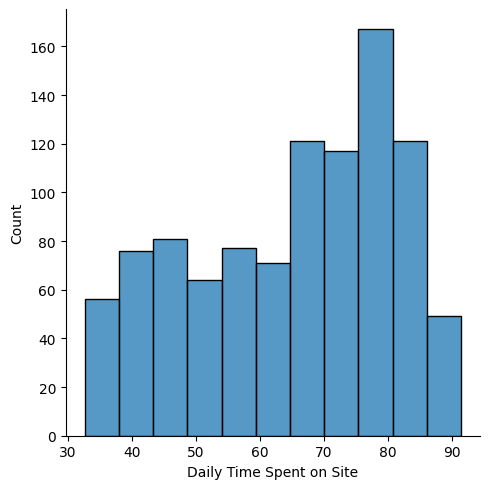

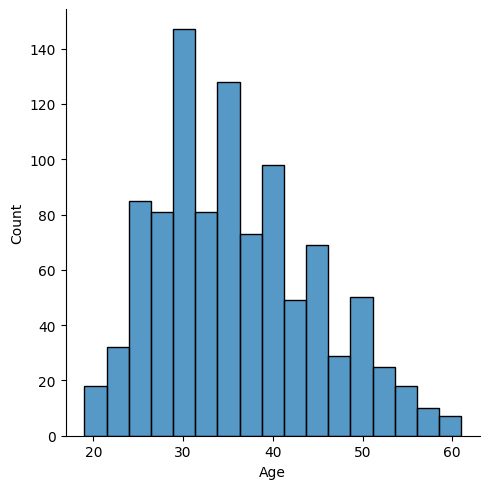

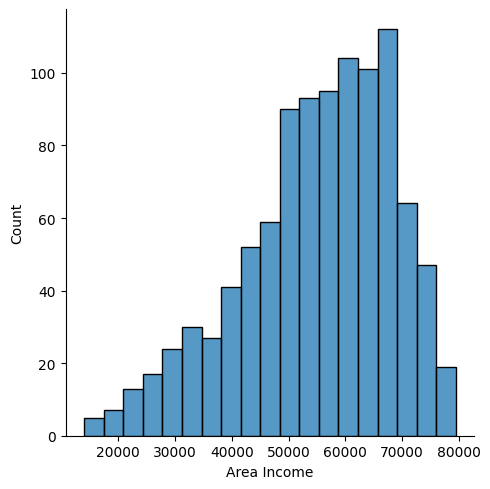

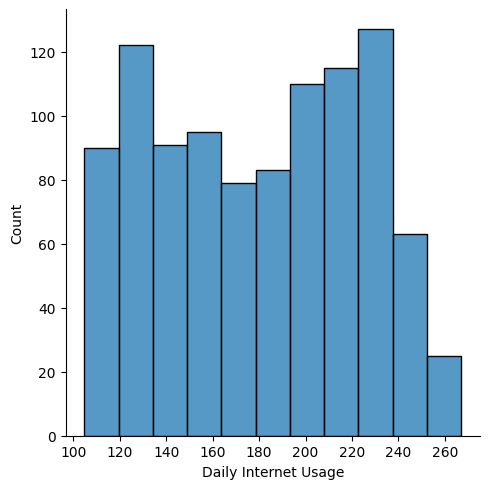

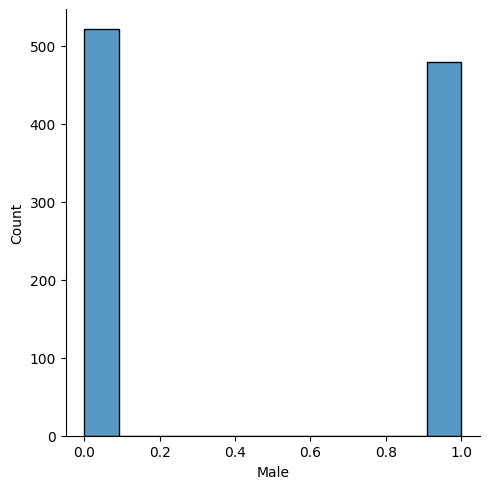

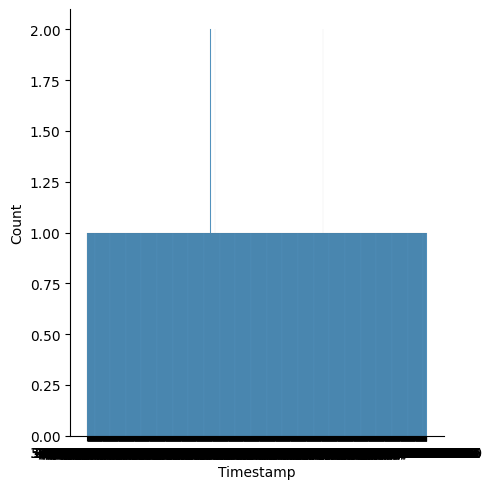

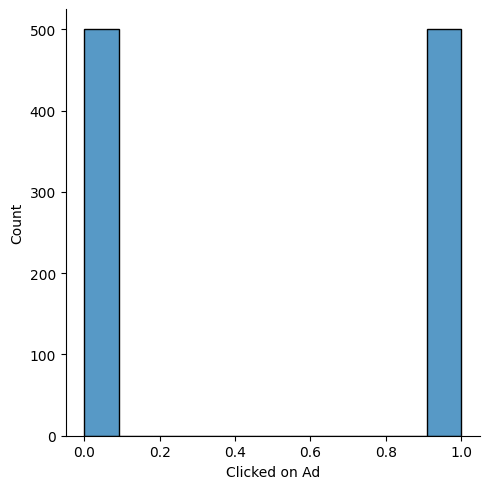

In [16]:
# Plottiing the distribution of data

for i in df.columns:
    sns.displot(data=df, x=i)
    plt.show()


### Removing the outliers from Area Income

In [17]:
# Removing the outliers from Area Income

q1 = df["Area Income"].quantile(0.25)
q2 = df["Area Income"].quantile(0.75)
iqr = q2 - q1
df = df[(df["Area Income"] > q1 - 1.5 * iqr) &
        (df["Area Income"] < q2 + 1.5 * iqr)]


In [18]:
# Converting the timestamp to datetime format and extracting the day and month
df.Timestamp = pd.to_datetime(df.Timestamp)

df["Day"] = df.Timestamp.dt.day
df["Month"] = df.Timestamp.dt.month

# Dropping the timestamp column

df.drop("Timestamp", axis=1, inplace=True)


In [19]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Day,Month
0,68.950,35,61833.900,256.090,0.000,0,27,3
1,80.230,31,68441.850,193.770,1.000,0,4,4
2,69.470,26,59785.940,236.500,0.000,0,13,3
3,74.150,29,54806.180,245.890,1.000,0,10,1
4,68.370,35,73889.990,225.580,0.000,0,3,6


In [20]:
# Reindexing the dataframe making the Clicked on Ad as the last column

df = df.reindex(
    columns=[
        "Daily Time Spent on Site",
        "Age",
        "Area Income",
        "Daily Internet Usage",
        "Male",
        "Day",
        "Month",
        "Clicked on Ad",
    ]
)
df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Day,Month,Clicked on Ad
0,68.950,35,61833.900,256.090,0.000,27,3,0
1,80.230,31,68441.850,193.770,1.000,4,4,0
2,69.470,26,59785.940,236.500,0.000,13,3,0
3,74.150,29,54806.180,245.890,1.000,10,1,0
4,68.370,35,73889.990,225.580,0.000,3,6,0


In [21]:
# Splitting the data into X and y

X = df.drop("Clicked on Ad", axis=1)
y = df[["Clicked on Ad"]]


In [22]:
# Splitting the data into train and test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Importing Scaling Libraries

sc = StandardScaler()

# Selecting columns to be scaled with unique values greater than 2

cols = list(X_train.columns[X_train.nunique() > 2])

SCX_train = X_train.copy(deep=True)
SCX_test = X_test.copy(deep=True)

# Scaling the data
SCX_train[cols] = sc.fit_transform(SCX_train[cols])
SCX_test[cols] = sc.transform(SCX_test[cols])


In [23]:
# Importing the Different Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Importing the metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score,
)

In [24]:
# Creating a list of model name and models
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(n_estimators=200)),
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC(kernel="rbf")),
    ("KNN", KNeighborsClassifier(n_neighbors=11)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier(verbosity=0)),
    ("CatBoost", CatBoostClassifier(verbose=0)),
]

In [25]:
# Creating a dataframe to store the results
results = {}

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC Score": roc_auc_score(y_test, y_pred),
    }

# Printing the results
results = pd.DataFrame(results).T * 100
results.sort_values(by="ROC AUC Score", ascending=False)


,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Gaussian Naive Bayes,96.309,97.122,95.070,96.085,96.253
CatBoost,95.973,96.429,95.070,95.745,95.933
Random Forest,94.966,93.793,95.775,94.774,95.003
Decision Tree,94.631,93.750,95.070,94.406,94.651
XGBoost,94.631,93.750,95.070,94.406,94.651
Logistic Regression,89.262,91.667,85.211,88.321,89.080
KNN,71.812,73.770,63.380,68.182,71.434
SVM,70.134,74.312,57.042,64.542,69.547


> ### We are going to create model without the scaling of data because the scaling of data is not required for the Random Forest Classifier.

In [27]:
# Grid Search CV for Random Forest with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

# Param grid for Random Forest

param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [5, 10, 15, 20, 25, 30],
    "min_samples_split": [2, 5, 10, 15, 100],
    "min_samples_leaf": [1, 2, 5, 10],
}

# Creating the grid search cv

grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2
)

# Fitting the model

grid_search.fit(X_train, y_train)

# Printing the best parameters

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.9696486289229485
RandomForestClassifier(max_depth=25, min_samples_split=10)


In [28]:
accuracy_score(grid_search.predict(X_test), y_test)

0.9530201342281879

In [29]:
# Creating the model with best parameters
best_params = grid_search.best_params_

rf = RandomForestClassifier(**best_params)

# Fitting the model

rf.fit(X_train, y_train)

# Predicting the values

y_pred = rf.predict(X_test)

# Printing the results

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9530201342281879
Precision: 0.9444444444444444
Recall: 0.9577464788732394
F1 Score: 0.951048951048951
ROC AUC Score: 0.9532322137955941
Confusion Matrix:
 [[148   8]
 [  6 136]]


In [30]:
# Calculating the Precision, Recall, Sensitivity, Specificity using confusion matrix values

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(
    "True Negative:",
    tn,
    "False Positive:",
    fp,
    "False Negative:",
    fn,
    "True Positive:",
    tp,
)


print("Specificity:", tn / (tn + fp))

print("Precision:", tp / (tp + fp))

print("Recall/Sensitivity:", tp / (tp + fn))

True Negative: 148 False Positive: 8 False Negative: 6 True Positive: 136
Specificity: 0.9487179487179487
Precision: 0.9444444444444444
Recall/Sensitivity: 0.9577464788732394


## Tree Plotting for Random Forest

In [31]:
best_params


{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

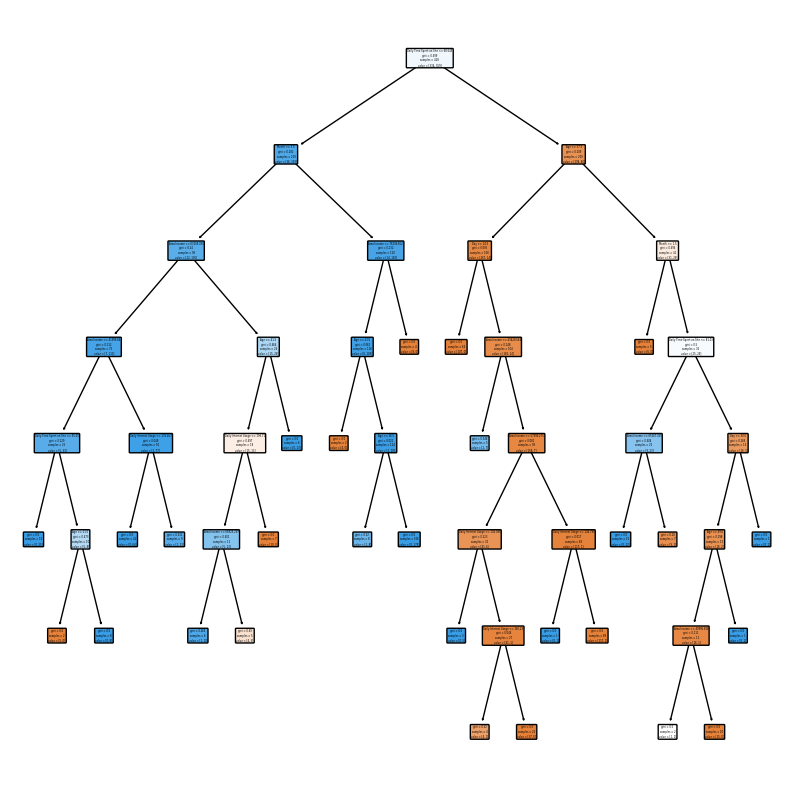

In [33]:
# Plotting the tree for Random Forest

from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(rf.estimators_[0], filled=True, rounded=True, feature_names=X.columns)
plt.savefig("rftree.png", dpi=300)
plt.show()

> ####  We can infer that the model is not overfitting because the training and testing accuracy is almost same.

> ####  We can infer from the tree that the most important feature is Daily Internet Usage.
